## Capstone Project

Objective: Develop a machine learning model to predict Telco customer churn (i.e., customers likely to stop using a product or service) and devise strategies to reduce churn rates based on your findings.

## 1. Import Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 2. Load the Data

In [146]:
df=pd.read_csv("assignment.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [148]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## 3. Data Exploration

In [123]:
# Check the basic information of the dataset
df.info()

# Summary statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 4. Data Cleaning

In [129]:
# Step 4: Data Cleaning

# 4.1 Check if the customerID column exists before dropping it
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
else:
    print("customerID column not found in the dataset.")

# 4.2 Converting TotalCharges to numeric, setting errors='coerce' will turn non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 4.3 Filling missing values in TotalCharges with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 4.4 Verify that no missing values remain
print(df.isnull().sum())


customerID column not found in the dataset.
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 5. Data Visualization

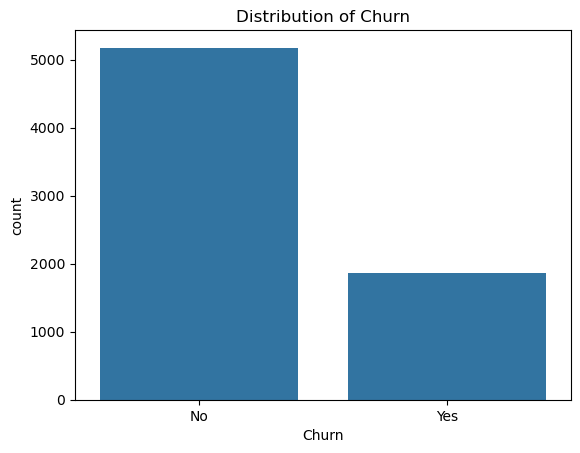

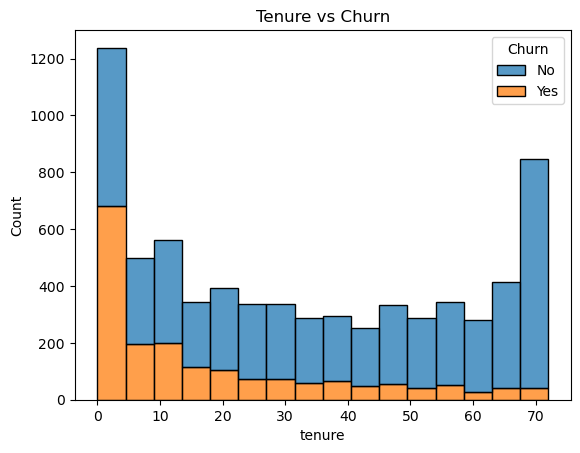

In [135]:
# Visualizing the distribution of churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Visualizing the relationship between tenure and churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure vs Churn')
plt.show()

## 6. Feature Engineering

In [142]:
# Encoding categorical features using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 7. Modeling

In [144]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7963094393186657

Confusion Matrix:
 [[946  90]
 [197 176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



## 8. Model Evaluation and Interpretation

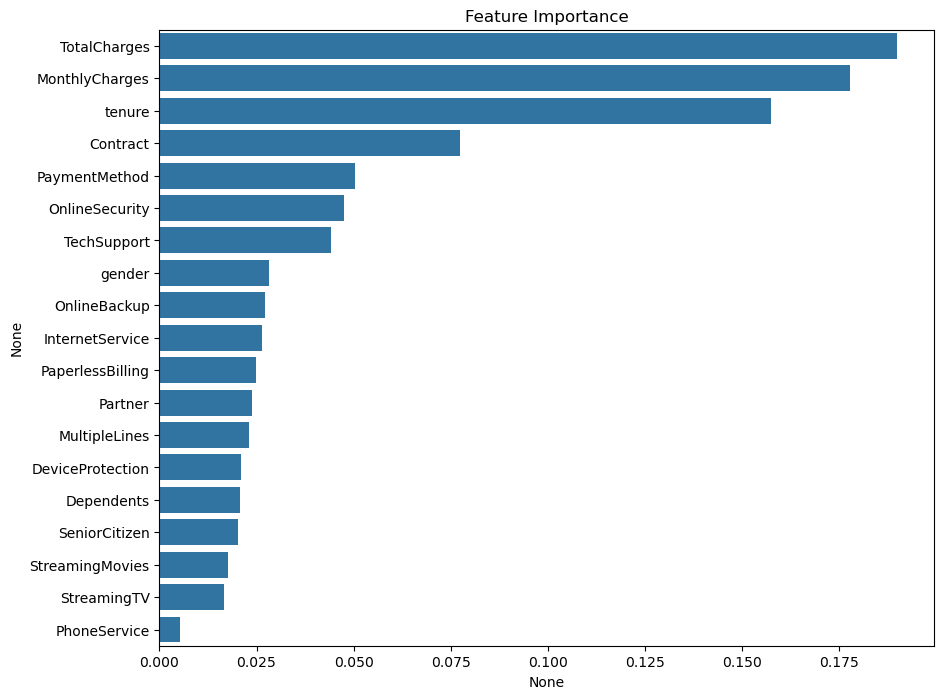

In [73]:
# Feature importance
importance = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()


## Question 2


Data Preprocessing: Clean the dataset by handling missing values, encoding categorical variables, and scaling numerical features. Perform feature engineering to create new features that could influence churn, such as average transaction value, frequency of customer service interactions, and tenure with the company.

## 1. Handling Missing Values

In [79]:
# Check for missing values in the dataset
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [115]:
print(df.isnull().sum())


Gender             0
Contract           0
InternetService    0
dtype: int64


## 2. Encoding Categorical Variables

Encoding Categorical Variables with LabelEncoder

In [83]:
from sklearn.preprocessing import LabelEncoder

# Assume 'Contract' is an ordinal categorical variable (for example)
ordinal_features = ['Contract']  # Replace with actual ordinal features in your dataset

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to ordinal features
for col in ordinal_features:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataset after label encoding
print("Dataset after Label Encoding (Ordinal Variables):")
print(df[ordinal_features].head())


Dataset after Label Encoding (Ordinal Variables):
   Contract
0         0
1         1
2         0
3         1
4         0


Encoding Categorical Variables with One-Hot Encoding

In [86]:
# Identify categorical columns (excluding ordinal features already encoded)
nominal_features = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to nominal categorical features
df_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Display the first few rows of the dataset after one-hot encoding
print("Dataset after One-Hot Encoding (Nominal Variables):")
print(df_encoded.head())


Dataset after One-Hot Encoding (Nominal Variables):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0          

Full combined outputs 

In [111]:
df

,Gender,Contract,InternetService
0,Male,0,DSL
1,Female,1,Fiber optic
2,Female,2,DSL
3,Male,0,Fiber optic


In [107]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encoding for ordinal variable 'Contract'
label_encoder = LabelEncoder()
df['Contract'] = label_encoder.fit_transform(df['Contract'])

# One-Hot Encoding for nominal variables 'gender' and 'InternetService'
df_encoded = pd.get_dummies(df, columns=['gender', 'InternetService'], drop_first=True)

print("Dataset after encoding:")
print(df_encoded.head())


KeyError: "['gender'] not in index"

# 3. Scaling Numerical Features

In [103]:
print(df.isnull().sum())

Gender             0
Contract           0
InternetService    0
dtype: int64


In [105]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


KeyError: "['Churn'] not found in axis"

In [94]:
# Check the shape and a few rows of the scaled features
print("Shape of scaled features:")
print(X_scaled.shape)

print("Sample of scaled features:")
print(X_scaled[:5])


Shape of scaled features:


NameError: name 'X_scaled' is not defined